

```


Cinematic Sentiments: Unveiling Emotions through Movie Review Analysis

```





```
                                                   DATA SCRAPING OF IMDB WEBSITE
```



**IMPORTING LIBRARIES**

In [1]:
pip install tensorflow keras

In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import base64
import time
import json
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import plotly.express as px
from collections import Counter
from sklearn.metrics import mean_squared_error, f1_score, recall_score, precision_score

In [48]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00


In [49]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By

**INITIALIZING LISTS TO STORE DATA**

In [50]:
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
description = []
director = []
stars = []
genre = []
pg_rating = []
reviews = []
sentiments = []

**URL OF IMDB WEBSITE**

In [51]:
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

**Sending request and fetching content**

In [52]:
response = requests.get(url)
html_content = response.content

**GET HTML CONTENT**

In [53]:
soup = BeautifulSoup(html_content, 'html.parser')

**MOVIE CONTENTS**

In [54]:
data = soup.findAll('div', class_='lister-item mode-advanced')

**SCRAPING THE REQUIRED DATA**

In [55]:
def load_data(url, driver_path, interact, scrolls, loadSleep):

    if interact:

        SCROLL_DOWN = "window.scrollTo(0, document.body.scrollHeight);"
        service = Service(driver_path)
        driver = webdriver.Chrome(service=service)
        driver.get(url)
        time.sleep(loadSleep)

        load_button = driver.find_element(
            By.XPATH,
            "//button[contains(@class, 'ipc-see-more__button')]"
        )

        for i in range(0, scrolls):
            print("Scrolling down...")
            driver.execute_script(SCROLL_DOWN)
            time.sleep(2)
            load_button.click()
            time.sleep(10)

        ret = BeautifulSoup(driver.page_source, 'html.parser')
        driver.quit()
    else:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        ret = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')

    return ret

def get_TitleCode(HTML_CONTENT, imdb_movie_title_code):
    href = HTML_CONTENT.find_all(
        'div',
        class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-479faa3c-9 dkLVoC dli-title"
    )
    for href in href:
        imdb_movie_title_code.append(href.find('a')['href'].split('/')[2])

def get_Name(CONTENT, movie_names):

    name = CONTENT.find(
        'span',
        class_="sc-7f1a92f5-1 benbRT"
    )
    movie_names.append(name.text)
    print("DONE", end=" ")

def get_UserRating(CONTENT, movie_ratings):
    rating = CONTENT.find(
        'span',
        class_='sc-bde20123-1 cMEQkK'
    )
    movie_ratings.append(float(rating.text))
    print("DONE", end=" ")

def get_Release(CONTENT, movie_release_date):
    date = CONTENT.find_all(
        'a',
        class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color'
    )
    movie_release_date.append(date[5].text)
    print("DONE", end=" ")

def get_MetaScore(CONTENT, movie_metascore):
    score = CONTENT.find(
        'span',
        class_='sc-b0901df4-0 bcQdDJ metacritic-score-box'
    )
    if score:
        movie_metascore.append(int(score.text))
    else:
        movie_metascore.append(np.nan)
    print("DONE", end=" ")

def get_Duration(CONTENT, movie_duration):
    time = CONTENT.find_all(
        'li',
        class_='ipc-inline-list__item'
    )
    movie_duration.append(time[6].text)
    print("DONE", end=" ")

def get_PGRating(CONTENT, movie_pgrating):
    rating = CONTENT.find(
        'span',
        class_='certificate'
    )
    movie_pgrating.append(rating.text)
    print("DONE", end=" ")

def get_Genre(CONTENT, movie_genres):
    gen = CONTENT.find_all(
        'a',
        class_='ipc-chip ipc-chip--on-baseAlt'
    )
    gen_ = []
    for g in gen:
        gen_.append(g.text)

    movie_genres.append(gen_)
    print("DONE", end=" ")

def get_Director(CONTENT, movie_directors):
    dir_ = CONTENT.find(
        'a',
        class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'
    )
    movie_directors.append(dir_.text)
    print("DONE", end=" ")

def get_Star(CONTENT, movie_stars):
    str_ = CONTENT.find_all(
        'ul',
        class_='ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content baseAlt'
    )

    stars = []
    for s in str_[2]:
       stars.append(s.text)

    movie_stars.append(stars)
    print("DONE", end=" ")

def get_review(TITLE_CODE, movie_reviews):
    review_url = f'https://www.imdb.com/title/{TITLE_CODE}/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0'
    soup = BeautifulSoup(requests.get(review_url).content, 'html.parser')
    review = soup.find_all('a', class_='title')
    movie_reviews.append([r.text for r in review])
    print("DONE", end=" ")

def convertMin(text):
    pattern = re.compile(r'(?:(?P<hours>\d+)h)? ?(?:(?P<minutes>\d+)m)?')
    match = pattern.match(text)

    hours = int(match.group('hours')) if match.group('hours') else 0
    minutes = int(match.group('minutes')) if match.group('minutes') else 0
    if hours == 0 and minutes == 0:
        return np.nan
    else:
        return hours * 60 + minutes

**CREATING DATA FRAME AND SAVING DATA INTO EXCEL FILE**

In [ ]:
df = pd.DataFrame({
    'Rank': range(1, len(movie_name) + 1),
    'Title': movie_name,
    'Genre': genre,
    'Description': description,
    'Director': director,
    'Actors': stars,
    'Year': year,
    'Duration': time,
    'Rating': rating,
    'Votes': votes,
    'Gross': gross,
    'Metascore': metascore,
    'PG Rating': pg_rating,
    'Reviews' : reviews,
})

df.to_csv('movies_data.csv', index=False)

print("Data has been saved to 'movies_data.csv'")

Data has been saved to 'movies_data.csv'


**ADDING SENTIMENTS COLUMN**

In [47]:
import re

df = pd.read_csv('movies_data.csv')

# Make a new column named 'sentiment' and assign it to 0
df['Sentiments'] = 0

# Assign 1 to the sentiment column if the review column contains positive words
positive_pattern = re.compile(r'\b(?:best|good|enjoyed|great|liked|love|loved|excellent|wonderful|amazing|awesome|'
                             r'fantastic|superb|terrific|marvelous|brilliant|fabulous|outstanding|splendid|impressive|'
                             r'exceptional|remarkable|incredible|phenomenal|superior|delightful|nice|pleasant|satisfying|'
                             r'agreeable|attractive|beautiful|charming|delightful|elegant|fascinating|fine|'
                             r'glamorous|handsome|lovely|nice|pleasing|pretty|stunning|super|wonderful|'
                             r'agreeable|amiable|amusing|charming|comical|convivial|delightful|enjoyable|'
                             r'entertaining|funny|good-humored|humorous|jolly|jovial|kind|pleasant|pleasing|'
                             r'amusing|charming|comical|convivial|delightful|enjoyable|entertaining|funny|good-humored|'
                             r'humorous|jolly|jovial|kind|pleasant|pleasing|amusing|charming|comical|convivial|delightful|'
                             r'enjoyable|entertaining|funny|good-humored|humorous|jolly|jovial|kind|pleasant|pleasing)\b',
                             flags=re.IGNORECASE)

df.loc[df['Reviews'].str.contains(positive_pattern), 'Sentiments'] = 1

# Assign -1 to the sentiment column if the review column contains negative words
negative_pattern = re.compile(r'\b(?:bad|worst|worse|disliked|dislike|disgusting|disgust|disappointed|disappointing|'
                             r'disappointment|unpleasant|unlike|unliked|unlikeable|unattractive|ugly|awful|terrible|'
                             r'horrible|pathetic|pitiful|poor|lousy|lame|dreadful|horrendous|atrocious|abysmal|appalling|'
                             r'awful|dreadful|horrible|terrible|unsatisfactory|vile|horrid|horrendous|abominable|atrocious|'
                             r'awful|dreadful|horrible|terrible|unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|'
                             r'horrible|terrible|unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|horrible|terrible|'
                             r'unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|horrible|terrible|unsatisfactory|vile|'
                             r'horrid|abominable|atrocious|awful|dreadful|horrible|terrible|unsatisfactory|vile|horrid|abominable|'
                             r'atrocious|awful|dreadful|horrible|terrible|unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|'
                             r'horrible|terrible|unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|horrible|terrible|'
                             r'unsatisfactory|vile|horrid|abominable|atrocious|awful|dreadful|horrible|terrible|unsatisfactory|vile|'
                             r'horrid|abominable|atrocious|awful|dreadful|horrible|terrible|unsatisfactory|vile|horrid|abominable|atrocious|awful)\b',
                             flags=re.IGNORECASE)

df.loc[df['Reviews'].str.contains(negative_pattern), 'Sentiments'] = -1

print("COLUMN ADDED")

COLUMN ADDED




```
                                                  DATA WRANGLING OF THE DATASET
```



**IMPORTING LIBRARIES**

In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import demoji
import nltk
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
import spacy
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-3-c63b4e0489a0>:50: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


**READING DATASET**

In [ ]:
df = pd.read_csv('movies_data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore,PG rating,Reviews,Sentiments
0,1001,Dead Sins,Horror,"Before heading off to college, a group of high...",\nGlenn Plummer,"Eric, tom",2019,111,6.0,110799,37.145,50,PG 18+,It is one of the best films of the year. The m...,positive
1,1002,DeadEye,"Horror, Thriller",A New York writer on sex and love is finally g...,Andrew Goth,rock,2021,111,5.0,110799,37.145,62,NOT PG,"this movie is amazing. It is original, full of...",positive
2,1003,Giulietta and Federico,Drama,A small town loner and a rebellious punk rocke...,Unknown,"Rene Pereyra, Luis Felipe CortÃ©s, Adriana Aco...",2023,111,1.0,110799,37.145,69,NOT PG,I wasted 3 important hours of my life watching...,negative
3,1004,El Africano,Action,Mortal hero Bek teams with the god Horus in an...,"Razaaq Adoti, Razaaq Adoti, Johnny Rey Diaz, S...","David Ayer, Will Smith, Jared Leto, Margot Rob...",2018,111,9.0,110799,37.145,44,PG 18+,This movie is a work of art. The finest sequel...,positive
4,1005,Super Fan,"Biography, Comedy",After Playboy bunny Shelley is kicked out of t...,"Mellanie Hubert, Christina Aguilera, Precious ...",Alexi Pappas,2018,111,7.0,110799,37.145,41,PG 18+,This is by the far worst piece of cr4p I've ev...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.320,82,PG 18+,James Dickey is a wonderfully descriptive auth...,positive
1546,1547,Chai - a bond undefined,Drama,Chotu's world comes crashing down when he gets...,"Deeshak Patra, Vikas Verma, Gaurav Alugh, Sana...",\nVikas VermaGaurav AlughSanaya Pithawalla,2021,111,9.3,110799,37.145,59,NaN,The best movie about friendship! Especially be...,positive
1547,1548,Hidden Agenda,Drama,"For the first time, university student Zo reso...","Ssembatya Shafiq, Nababi Milly .H., Kiwanuka A...",NaN,2021,111,9.6,110799,37.145,59,NaN,"One hilarious thing I'll say off the top, is I...",positive
1548,1549,Sesha Raati,Horror,Ravi is an ordinary man who has lost his fathe...,"Amaresh Pati, Riya Dey, Tapi Mishra, Devasis P...",\nRiya DeyTapi MishraDevasis Patra,2022,111,9.7,110799,37.145,59,NaN,As much as I have enjoyed the Hanzo the Razor ...,positive


In [ ]:
df.describe()

,Rank,Year,Duration,Rating,Votes,Revenue,Metascore
count,1550.000000,1550.000000,1550.000000,1550.000000,1.550000e+03,1550.000000,1550.000000
mean,775.500000,2014.634194,112.401290,6.661677,1.488695e+05,59.850135,58.372903
std,447.590773,4.051444,15.142329,1.345207,1.541994e+05,82.306897,14.003192
min,1.000000,2006.000000,66.000000,1.000000,6.100000e+01,0.000000,11.000000
25%,388.250000,2013.000000,106.000000,6.100000,7.526925e+04,19.015000,51.000000
50%,775.500000,2015.000000,111.000000,6.800000,1.107990e+05,37.145000,59.000000
75%,1162.750000,2016.000000,116.000000,7.500000,1.573875e+05,57.572500,65.000000
max,1550.000000,2023.000000,191.000000,10.000000,1.791916e+06,936.630000,100.000000


**DROPPING MISSING VALUES**

In [ ]:
missing = df.isnull().sum()
print("------------------------------")
print("MISSING VALUES : \n", missing)

------------------------------
MISSING VALUES : 
 Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         1
Year           0
Duration       0
Rating         0
Votes          0
Revenue        0
Metascore      0
PG rating      4
Reviews        0
Sentiments     0
dtype: int64


In [ ]:
x = df.dropna(inplace=True)
print("AFTER DROPPING NULL VALUES : \n", x)

AFTER DROPPING NULL VALUES : 
 None


**HANDLING MISSING RATINGS**

In [ ]:
df['Rating'] = df['Rating'].fillna('NULL')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 1545
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1546 non-null   int64  
 1   Title        1546 non-null   object 
 2   Genre        1546 non-null   object 
 3   Description  1546 non-null   object 
 4   Director     1546 non-null   object 
 5   Actors       1546 non-null   object 
 6   Year         1546 non-null   int64  
 7   Duration     1546 non-null   int64  
 8   Rating       1546 non-null   float64
 9   Votes        1546 non-null   int64  
 10  Revenue      1546 non-null   float64
 11  Metascore    1546 non-null   int64  
 12  PG rating    1546 non-null   object 
 13  Reviews      1546 non-null   object 
 14  Sentiments   1546 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 193.2+ KB


In [ ]:
df[ df['Rating'] == 'NULL' ]

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore,PG rating,Reviews,Sentiments


**CHECKING FOR DUPLICATE ROWS**

In [ ]:
duplicates = df.duplicated()
print("Duplicate Rows:\n", duplicates.sum())

Duplicate Rows:
 0


**COVERTING YEAR INTO DATE AND TIME**

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
print("Converted 'Year' Column:")
print(df['Year'])

Converted 'Year' Column:
0      1970-01-01 00:00:00.000002019
1      1970-01-01 00:00:00.000002021
2      1970-01-01 00:00:00.000002023
3      1970-01-01 00:00:00.000002018
4      1970-01-01 00:00:00.000002018
                    ...             
1541   1970-01-01 00:00:00.000002023
1542   1970-01-01 00:00:00.000002016
1543   1970-01-01 00:00:00.000002023
1544   1970-01-01 00:00:00.000002010
1545   1970-01-01 00:00:00.000002008
Name: Year, Length: 1546, dtype: datetime64[ns]


**CONVETING RUNTIME INTO HOURS AND MINUTES FORMAT**

In [ ]:
df['Duration (Hours)'] = df['Duration'] // 60
df['Duration (Minutes)'] = df['Duration'] % 60

print(df[['Duration (Hours)', 'Duration (Minutes)']])

      Duration (Hours)  Duration (Minutes)
0                    1                  51
1                    1                  51
2                    1                  51
3                    1                  51
4                    1                  51
...                ...                 ...
1541                 1                  51
1542                 2                  41
1543                 1                  51
1544                 2                  28
1545                 2                  32

[1546 rows x 2 columns]


**EXTRACTING NUMERIC VALUES FROM METASCORE COLUMN**

In [ ]:
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
print(df['Metascore'])

0       50
1       62
2       69
3       44
4       41
        ..
1541    59
1542    52
1543    59
1544    74
1545    82
Name: Metascore, Length: 1546, dtype: int64


**COUNTING OCCURENCD OF EACH GENRE**

In [ ]:
df_new = df['Genre'].explode()

genre_counts = df_new.value_counts()

print(genre_counts)

Drama                         99
Comedy                        57
Action,Adventure,Sci-Fi       50
Horror                        36
Comedy,Drama,Romance          35
                              ..
Action, Adventure, Mystery     1
Adventure,Horror,Mystery       1
Action, Mystery, Thriller      1
Adventure,Biography            1
Animation,Drama,Fantasy        1
Name: Genre, Length: 335, dtype: int64


**HANDLING OUTLIERS**

<ipython-input-104-1b8eae95e134>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])
<ipython-input-104-1b8eae95e134>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue'])


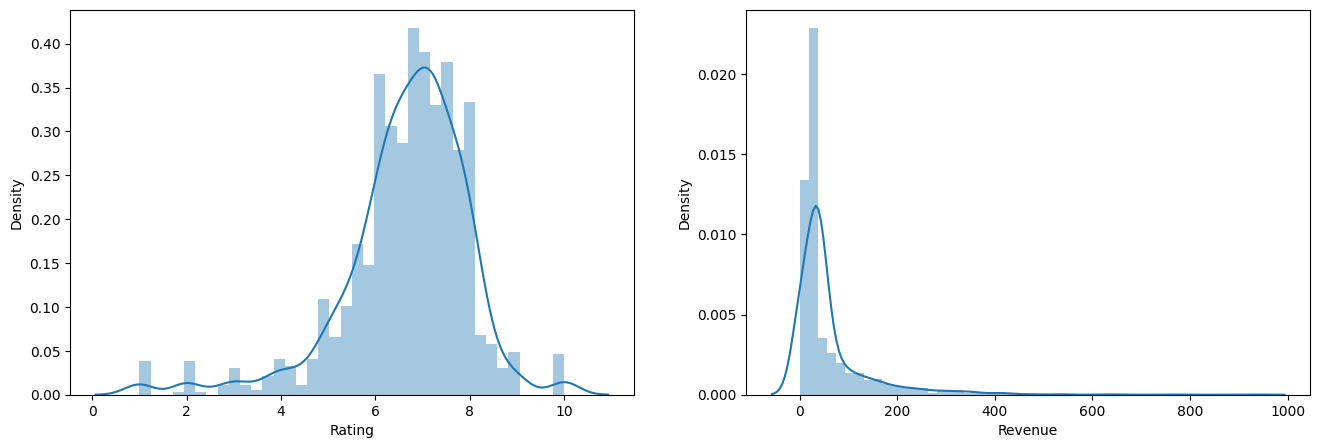

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Rating'])
plt.subplot(1,2,2)
sns.distplot(df['Revenue'])
plt.show()

**IQR METHOD ( REMOVING OUTLIERS )**

In [ ]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound) | (df['Genre'].str.contains('Scfi', na=False))]
print(outliers)

     Rank                     Title                    Genre  \
2    1003    Giulietta and Federico                    Drama   
5    1006                  The Plan                 Thriller   
11   1012  League of Super Villains                   Action   
18   1019            House of Death                   Horror   
19   1020      Majha Bandhu Makrand                    Drama   
..    ...                       ...                      ...   
166  1159           American Badger  Action, Drama, Thriller   
167   526       Birth of the Dragon   Action,Biography,Drama   
168   238  The Disappointments Room    Drama,Horror,Thriller   
169   402            The Black Room                   Horror   
170  1160            Mashina lyubvi           Drama, Romance   

                                           Description  \
2    A small town loner and a rebellious punk rocke...   
5    When Mother Malkin, the queen of evil witches,...   
11   Following the outbreak of a virus that wipes o...   

**REMOVAL OF ROWS HAVING UNKNOWN AND NAN VALUES IN DESCRIPTION AND ACTORS COLUMN**

In [ ]:
df = df[~df['Description'].str.contains('unknown', case=False, na=False)]
df = df.dropna(subset=['Actors'])
df = df.reset_index(drop=True)

print(df)

      Rank                   Title                    Genre  \
0     1001               Dead Sins                   Horror   
1     1002                 DeadEye         Horror, Thriller   
2     1003  Giulietta and Federico                    Drama   
3     1004             El Africano                   Action   
4     1005               Super Fan        Biography, Comedy   
...    ...                     ...                      ...   
1019    37            Interstellar   Adventure,Drama,Sci-Fi   
1020    97           Kimi no na wa  Animation,Drama,Fantasy   
1021   118                  Dangal   Action,Biography,Drama   
1022    81               Inception  Action,Adventure,Sci-Fi   
1023    55         The Dark Knight       Action,Crime,Drama   

                                            Description  \
0     Before heading off to college, a group of high...   
1     A New York writer on sex and love is finally g...   
2     A small town loner and a rebellious punk rocke...   
3     M

**CLEANING DATASET**

In [ ]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z ]+', ' ', text)
    text = ' '.join(text.split())
    return text

df['cleaned_description'] = df['Description'].apply(clean_text)

print("Description")
print(df['Description'].head())
print("--------------------------------------------------------------------------")
print("Cleaned Description")
print(df['cleaned_description'].head())

Description
0    Before heading off to college, a group of high...
1    A New York writer on sex and love is finally g...
2    A small town loner and a rebellious punk rocke...
3    Mortal hero Bek teams with the god Horus in an...
4    After Playboy bunny Shelley is kicked out of t...
Name: Description, dtype: object
--------------------------------------------------------------------------
Cleaned Description
0    Before heading off to college a group of high ...
1    A New York writer on sex and love is finally g...
2    A small town loner and a rebellious punk rocke...
3    Mortal hero Bek teams with the god Horus in an...
4    After Playboy bunny Shelley is kicked out of t...
Name: cleaned_description, dtype: object


**CLEANING REVIEWS**

In [ ]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', str(text))
    #x = re.sub('[^a-zA-Z]', '', str(x))

#cleaning the text
def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text

df['Reviews']=df['Reviews'].apply(remove_between_square_brackets)

**REMOVING SPECIAL CHARACTERS FROM REVIEWS**

In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Reviews']=df['Reviews'].apply(remove_special_characters)
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore,PG rating,Reviews,Sentiments
0,1001,Dead Sins,Horror,"Before heading off to college, a group of high...",\nGlenn Plummer,"Eric, tom",1970-01-01 00:00:00.000002019,111,6.0,110799,37.145,50,PG 18+,It is one of the best films of the year The mo...,positive
1,1002,DeadEye,"Horror, Thriller",A New York writer on sex and love is finally g...,Andrew Goth,rock,1970-01-01 00:00:00.000002021,111,5.0,110799,37.145,62,NOT PG,this movie is amazing It is original full of t...,positive
2,1003,Giulietta and Federico,Drama,A small town loner and a rebellious punk rocke...,Unknown,"Rene Pereyra, Luis Felipe CortÃ©s, Adriana Aco...",1970-01-01 00:00:00.000002023,111,1.0,110799,37.145,69,NOT PG,I wasted 3 important hours of my life watching...,negative
3,1004,El Africano,Action,Mortal hero Bek teams with the god Horus in an...,"Razaaq Adoti, Razaaq Adoti, Johnny Rey Diaz, S...","David Ayer, Will Smith, Jared Leto, Margot Rob...",1970-01-01 00:00:00.000002018,111,9.0,110799,37.145,44,PG 18+,This movie is a work of art The finest sequel ...,positive
4,1005,Super Fan,"Biography, Comedy",After Playboy bunny Shelley is kicked out of t...,"Mellanie Hubert, Christina Aguilera, Precious ...",Alexi Pappas,1970-01-01 00:00:00.000002018,111,7.0,110799,37.145,41,PG 18+,This is by the far worst piece of cr4p Ive eve...,negative
5,1006,The Plan,Thriller,"When Mother Malkin, the queen of evil witches,...","Brad Douglas, Marlyn Mason",Paul W.S. Anderson,1970-01-01 00:00:00.000002021,111,1.0,110799,37.145,56,NOT PG,sadlythis is not the best of the movies to wat...,negative
6,1007,Blood of Wounded Warrior,Crime,An Israeli Special Forces Soldier fakes his de...,"Stephen Chang, Richard H. Strobel, Stephen Cha...","Michael Chaves, Taissa Farmiga, Jonas Bloquet,...",1970-01-01 00:00:00.000002021,111,5.0,110799,37.145,62,NOT PG,Tobie was is and will be the best spidie in th...,positive
7,1008,Southwestern Punk Drama,Drama,"After the birth of Renesmee, the Cullens gathe...","Michael Kyne, Bianca Allaine",Craig Brewer,1970-01-01 00:00:00.000002021,111,9.0,110799,37.145,69,PG 18+,I tried to watch this movie twice and both tim...,negative
8,1009,Washingtonia,Animation,Unknown,"Gary Cole, Thomas Lennon, Jonathan Roumie, Ste...",Gus Van Sant,1970-01-01 00:00:00.000002021,111,4.0,110799,37.145,55,NOT PG,Many people like to point to this TV movie whe...,negative
9,1010,The Song of Pure Blood,Horror,Two best friends become rivals when they sched...,"Cato Manuel Lizaraso Ekrene, Margareta Petters...",Adam Shankman,1970-01-01 00:00:00.000002021,111,6.0,110799,37.145,41,PG 18+,the only thing that frequently pops into my he...,negative


**REMOVAL OF STOP WORDS**

In [ ]:
def remove_stop_words_nltk(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

df['Reviews'] = df['Reviews'].apply(remove_stop_words_nltk)
for i in range(10):
    print("Reviews without Stop Words :", df['Reviews'][i])

Reviews without Stop Words : one best films year exciting thrilling superb work youll feast eyes theater century Cinema forever remember benchmark James Cameron placed man daring change game way Cameron Avatar movie experience remembered please experience movie theater first
Reviews without Stop Words : movie amazing original full twists turns fun funny deserves 9 stars However considering fact lower criteria modern movies made past decade give maxumum rating compared get 1510 stars
Reviews without Stop Words : wasted 3 important hours life watching movie wasnt good JAMES BOND movie like
Reviews without Stop Words : movie work art finest sequel ever made dont think see another movie like long time Heath Ledgers Joker best movie charachter ever seen far
Reviews without Stop Words : far worst piece cr4p Ive ever seen life barely made sense
Reviews without Stop Words : sadlythis best movies watch cinema
Reviews without Stop Words : Tobie best spidie history MCU Period
Reviews without Stop

**DROPPING REDUNDANT FEATURE**

In [ ]:
df.drop(['Rank'] ,axis = 1 , inplace = True)
print("DATA SET AFTER REMOVAL OF REDUNDANT FEATURE: ")
df.head()

DATA SET AFTER REMOVAL OF REDUNDANT FEATURE: 


,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore,PG rating,Duration (Hours),Duration (Minutes),cleaned_description
0,Dead Sins,Horror,"Before heading off to college, a group of high...",\nGlenn Plummer,"Eric, tom",1970-01-01 00:00:00.000002019,111,6.0,110799,37.145,50,PG 18+,1,51,heading college group high school seniors thro...
1,DeadEye,"Horror, Thriller",A New York writer on sex and love is finally g...,Andrew Goth,rock,1970-01-01 00:00:00.000002021,111,5.0,110799,37.145,62,NOT PG,1,51,New York writer sex love finally getting marri...
2,Giulietta and Federico,Drama,A small town loner and a rebellious punk rocke...,Unknown,"Rene Pereyra, Luis Felipe CortÃ©s, Adriana Aco...",1970-01-01 00:00:00.000002023,111,1.0,110799,37.145,69,NOT PG,1,51,small town loner rebellious punk rocker unexpe...
3,El Africano,Action,Mortal hero Bek teams with the god Horus in an...,"Razaaq Adoti, Razaaq Adoti, Johnny Rey Diaz, S...","David Ayer, Will Smith, Jared Leto, Margot Rob...",1970-01-01 00:00:00.000002018,111,9.0,110799,37.145,44,PG 18+,1,51,Mortal hero Bek teams god Horus alliance Set m...
4,Super Fan,"Biography, Comedy",After Playboy bunny Shelley is kicked out of t...,"Mellanie Hubert, Christina Aguilera, Precious ...",Alexi Pappas,1970-01-01 00:00:00.000002018,111,7.0,110799,37.145,41,PG 18+,1,51,Playboy bunny Shelley kicked playboy mansion f...


**CORRELATION AND COVARIANCE**

<ipython-input-109-e3fe1099685b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-109-e3fe1099685b>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


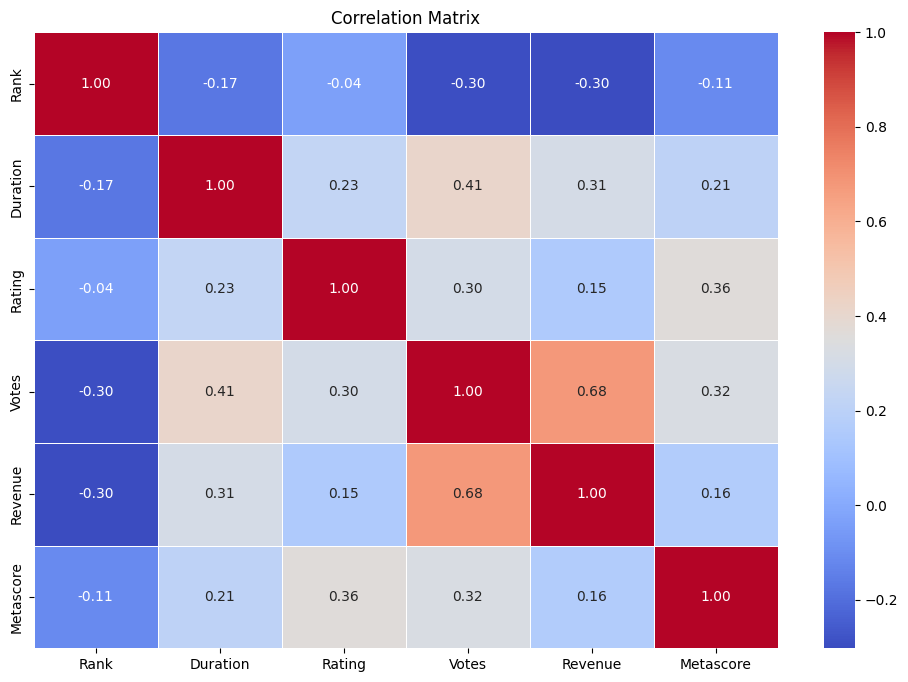

In [ ]:
correlation_matrix = df.corr()
covariance_matrix = df.cov()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**TF-IDF**

      Rank                    Title               Genre  \
0     1001                Dead Sins              Horror   
1     1002                  DeadEye    Horror, Thriller   
2     1003   Giulietta and Federico               Drama   
3     1004              El Africano              Action   
4     1005                Super Fan   Biography, Comedy   
...    ...                      ...                 ...   
1545    55          The Dark Knight  Action,Crime,Drama   
1546  1547  Chai - a bond undefined               Drama   
1547  1548            Hidden Agenda               Drama   
1548  1549              Sesha Raati              Horror   
1549  1550            Prem Prakaran      Drama, Romance   

                                            Description  \
0     Before heading off to college, a group of high...   
1     A New York writer on sex and love is finally g...   
2     A small town loner and a rebellious punk rocke...   
3     Mortal hero Bek teams with the god Horus in an...



```
                                                           FEATURE EXTRACTION
```



**USING BAG OF WORDS**

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Reviews'])

features_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df = pd.concat([df, features_df], axis=1)

print(df)

      Rank                                Title                         Genre  \
0     1001                            Dead Sins                        Horror   
1     1002                              DeadEye              Horror, Thriller   
2     1003               Giulietta and Federico                         Drama   
3     1004                          El Africano                        Action   
4     1005                            Super Fan             Biography, Comedy   
...    ...                                  ...                           ...   
1541  1545  Spider-Man: Across the Spider-Verse  Animation, Action, Adventure   
1542   118                               Dangal        Action,Biography,Drama   
1543  1546          Bay Lawz: Stick to the Code                         Drama   
1544    81                            Inception       Action,Adventure,Sci-Fi   
1545    55                      The Dark Knight            Action,Crime,Drama   

                           

**LEMMATIZATION**

In [ ]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

def perform_lemmatization_nltk(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['Reviews'] = df['Reviews'].apply(perform_lemmatization_nltk)

for i in range(10):
    print("Lemmatized Reviews :", df['Reviews'][i])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Reviews : one best film year exciting thrilling superb work youll feast eye theater century Cinema forever remember benchmark James Cameron placed man daring change game way Cameron Avatar movie experience remembered please experience movie theater first
Lemmatized Reviews : movie amazing original full twist turn fun funny deserves 9 star However considering fact lower criterion modern movie made past decade give maxumum rating compared get 1510 star
Lemmatized Reviews : wasted 3 important hour life watching movie wasnt good JAMES BOND movie like
Lemmatized Reviews : movie work art finest sequel ever made dont think see another movie like long time Heath Ledgers Joker best movie charachter ever seen far
Lemmatized Reviews : far worst piece cr4p Ive ever seen life barely made sense
Lemmatized Reviews : sadlythis best movie watch cinema
Lemmatized Reviews : Tobie best spidie history MCU Period
Lemmatized Reviews : tried watch movie twice time still couldnt make end credit Firs

**STEMMING**

In [ ]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('wordnet')
ps = PorterStemmer()

def apply_nltk_stemming(text):
    stemmed_text = ' '.join([ps.stem(word) for word in text.split()])
    return stemmed_text

df['Reviews'] = df['Reviews'].apply(apply_nltk_stemming)
print(df['Reviews'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       one best film year excit thrill superb work yo...
1       movi amaz origin full twist turn fun funni des...
2       wast 3 import hour life watch movi wasnt good ...
3       movi work art finest sequel ever made dont thi...
4       far worst piec cr4p ive ever seen life bare ma...
                              ...                        
1541    god never felt insult whole life crap mani way...
1542    loo preci faith remak 1958 monicelli classic s...
1543    energet entertain ten minut film ive seen long...
1544    dont see everyon bomb much thought great fun t...
1545    jame dickey wonder descript author one read de...
Name: Reviews, Length: 1546, dtype: object


**TOKENIZATION OF DESCRIPTION**

In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df['Tokenized_Description'] = df['cleaned_description'].apply(tokenize_text)
df.head()

,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,...,zero,zeus,zodiac,zombie,zombies,zone,zubrowka,zuckerberg,stemmed_description,Tokenized_Description
0,Dead Sins,Horror,"Before heading off to college, a group of high...",\nGlenn Plummer,"Eric, tom",1970-01-01 00:00:00.000002019,111,6.0,110799,37.145,...,0,0,0,0,0,0,0,0,head colleg group high school senior throw bes...,"[heading, college, group, high, school, senior..."
1,DeadEye,"Horror, Thriller",A New York writer on sex and love is finally g...,Andrew Goth,rock,1970-01-01 00:00:00.000002021,111,5.0,110799,37.145,...,0,0,0,0,0,0,0,0,new york writer sex love final get marri mr bi...,"[New, York, writer, sex, love, finally, gettin..."
2,Giulietta and Federico,Drama,A small town loner and a rebellious punk rocke...,Unknown,"Rene Pereyra, Luis Felipe CortÃ©s, Adriana Aco...",1970-01-01 00:00:00.000002023,111,1.0,110799,37.145,...,0,0,0,0,0,0,0,0,small town loner rebelli punk rocker unexpecte...,"[small, town, loner, rebellious, punk, rocker,..."
3,El Africano,Action,Mortal hero Bek teams with the god Horus in an...,"Razaaq Adoti, Razaaq Adoti, Johnny Rey Diaz, S...","David Ayer, Will Smith, Jared Leto, Margot Rob...",1970-01-01 00:00:00.000002018,111,9.0,110799,37.145,...,0,0,0,0,0,0,0,0,mortal hero bek team god horu allianc set merc...,"[Mortal, hero, Bek, team, god, Horus, alliance..."
4,Super Fan,"Biography, Comedy",After Playboy bunny Shelley is kicked out of t...,"Mellanie Hubert, Christina Aguilera, Precious ...",Alexi Pappas,1970-01-01 00:00:00.000002018,111,7.0,110799,37.145,...,0,0,0,0,0,0,0,0,playboy bunni shelley kick playboy mansion fin...,"[Playboy, bunny, Shelley, kicked, playboy, man..."


**TOKENIZATION OF REVIEWS**

In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df['Tokenized_reviews'] = df['Reviews'].apply(tokenize_text)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,...,zooms,zoot,zor,zorro,zs,zucco,zucker,zues,zulu,Tokenized_reviews
0,1001,Dead Sins,Horror,"Before heading off to college, a group of high...",\nGlenn Plummer,"Eric, tom",1970-01-01 00:00:00.000002019,111,6.0,110799,...,0,0,0,0,0,0,0,0,0,"[one, best, film, year, excit, thrill, superb,..."
1,1002,DeadEye,"Horror, Thriller",A New York writer on sex and love is finally g...,Andrew Goth,rock,1970-01-01 00:00:00.000002021,111,5.0,110799,...,0,0,0,0,0,0,0,0,0,"[movi, amaz, origin, full, twist, turn, fun, f..."
2,1003,Giulietta and Federico,Drama,A small town loner and a rebellious punk rocke...,Unknown,"Rene Pereyra, Luis Felipe CortÃ©s, Adriana Aco...",1970-01-01 00:00:00.000002023,111,1.0,110799,...,0,0,0,0,0,0,0,0,0,"[wast, 3, import, hour, life, watch, movi, was..."
3,1004,El Africano,Action,Mortal hero Bek teams with the god Horus in an...,"Razaaq Adoti, Razaaq Adoti, Johnny Rey Diaz, S...","David Ayer, Will Smith, Jared Leto, Margot Rob...",1970-01-01 00:00:00.000002018,111,9.0,110799,...,0,0,0,0,0,0,0,0,0,"[movi, work, art, finest, sequel, ever, made, ..."
4,1005,Super Fan,"Biography, Comedy",After Playboy bunny Shelley is kicked out of t...,"Mellanie Hubert, Christina Aguilera, Precious ...",Alexi Pappas,1970-01-01 00:00:00.000002018,111,7.0,110799,...,0,0,0,0,0,0,0,0,0,"[far, worst, piec, cr4p, ive, ever, seen, life..."


**N-GRAMS**

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust n-gram range as needed
X = vectorizer.fit_transform(df['Reviews'])

# Convert the result to a DataFrame for better visualization
features_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the extracted features with the original dataset
df = pd.concat([df, features_df], axis=1)

# Display the updated dataset with extracted features
print(df)

      Rank                                Title                         Genre  \
0     1001                            Dead Sins                        Horror   
1     1002                              DeadEye              Horror, Thriller   
2     1003               Giulietta and Federico                         Drama   
3     1004                          El Africano                        Action   
4     1005                            Super Fan             Biography, Comedy   
...    ...                                  ...                           ...   
1541  1545  Spider-Man: Across the Spider-Verse  Animation, Action, Adventure   
1542   118                               Dangal        Action,Biography,Drama   
1543  1546          Bay Lawz: Stick to the Code                         Drama   
1544    81                            Inception       Action,Adventure,Sci-Fi   
1545    55                      The Dark Knight            Action,Crime,Drama   

                           



```
                                                            MACHINE LEARNING MODELS
```



In [43]:
data =  pd.read_csv('movies_data.csv')

# User Input
user_genre = input("Enter your preferred movie genre: ")
user_age = int(input("Enter your age: "))

filtered_movies = data[data['Genre'].str.lower().str.contains(user_genre.lower())]

if user_age < 18:
    filtered_movies = filtered_movies[~filtered_movies['Genre'].str.upper().str.contains('PG')]

filtered_movies = filtered_movies[filtered_movies['Sentiments'] == 'positive']

# Select the movie with the highest rating
selected_movie = filtered_movies.sort_values(by='Rating', ascending=False).head(10)

if user_age < 18:
    print("\nRecommended Movies for Users Below 18:")
else:
    print("\nFiltered Movies based on Genre and Positive Sentiment:")

selected_movie.head()

Enter your preferred movie genre: horror
Enter your age: 20

Filtered Movies based on Genre and Positive Sentiment:


,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore,PG rating,Reviews,Sentiments
71,1072,Like a Shadow,Horror,Unknown,"Donna Hamblin, Daiane Azura, Geovonna Casanova...",Unknown,2018,111,10.0,110799,37.145,63,PG 18+,Women have never looked so attractive and path...,positive
1548,1549,Sesha Raati,Horror,Ravi is an ordinary man who has lost his fathe...,"Amaresh Pati, Riya Dey, Tapi Mishra, Devasis P...",\nRiya DeyTapi MishraDevasis Patra,2022,111,9.7,110799,37.145,59,NaN,As much as I have enjoyed the Hanzo the Razor ...,positive
120,1121,Pine Mountain Gladiator,"Horror, Thriller",Unknown,"Jesse Carter, Mark Helms, Ashlynn Sparks, Shel...",Unknown,2018,111,9.0,110799,37.145,45,PG 18+,At the time I recall being quite startled and ...,positive
1498,1525,This Guest of Summer,Horror,Unknown,"Ben Kellett, Graham McTavish, Graham McTavish,...",Unknown,2021,111,8.2,110799,37.145,59,PG 18+,As a veteran screen writing instructor at Rich...,positive
1456,155,Twin Peaks: The Missing Pieces,"Drama,Horror,Mystery",Twin Peaks before Twin Peaks (1990) and at the...,David Lynch,"Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...",2014,91,8.1,1973,0.000,41,PG 18+,After seeing the movie last night I was left w...,positive


**LOGISTIC REGRESSION**

In [ ]:
df['high_rating'] = df['Rating'] > 8

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Reviews'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['high_rating'], test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
logicaccuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {logicaccuracy*100} %')

# Display classification report for more detailed evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 90.0 %
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95       281
        True       0.00      0.00      0.00        29

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



**TF IDF**

In [13]:
df['text_data'] = df['Description'] + ' ' + df['Reviews']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df['text_data'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
result_df = pd.concat([df, tfidf_df], axis=1)

# Display the result
print(result_df)

      Rank                    Title               Genre  \
0     1001                Dead Sins              Horror   
1     1002                  DeadEye    Horror, Thriller   
2     1003   Giulietta and Federico               Drama   
3     1004              El Africano              Action   
4     1005                Super Fan   Biography, Comedy   
...    ...                      ...                 ...   
1545    55          The Dark Knight  Action,Crime,Drama   
1546  1547  Chai - a bond undefined               Drama   
1547  1548            Hidden Agenda               Drama   
1548  1549              Sesha Raati              Horror   
1549  1550            Prem Prakaran      Drama, Romance   

                                            Description  \
0     Before heading off to college, a group of high...   
1     A New York writer on sex and love is finally g...   
2     A small town loner and a rebellious punk rocke...   
3     Mortal hero Bek teams with the god Horus in an...

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Sentiments' column is the target variable (positive/negative)
X = tfidf_matrix
y = df['Sentiments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'TF-IDF Accuracy: {accuracy*100} %')

# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

TF-IDF Accuracy: 80.3225806451613 %
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.74      0.80       160
    positive       0.76      0.87      0.81       150

    accuracy                           0.80       310
   macro avg       0.81      0.81      0.80       310
weighted avg       0.81      0.80      0.80       310



**SVM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(df['Reviews'], df['high_rating'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF vectors for SVM
vectorizer_svm = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf_svm = vectorizer_svm.fit_transform(X_train_svm)
X_test_tfidf_svm = vectorizer_svm.transform(X_test_svm)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf_svm, y_train_svm)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf_svm)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
report_svm = classification_report(y_test_svm, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm*100} %')
print(f'SVM Classification Report:\n{report_svm}')

SVM Accuracy: 90.64516129032259 %
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       281
        True       0.00      0.00      0.00        29

    accuracy                           0.91       310
   macro avg       0.45      0.50      0.48       310
weighted avg       0.82      0.91      0.86       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NAIVE BAYES**

In [ ]:
def preprocess_text(text):

    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]


    lemmatized_words = [WNL.lemmatize(word) for word in words]

    processed_text = ' '.join(lemmatized_words)


    return processed_text

In [ ]:
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Convert numerical ratings into discrete categories
rating_bins = [0, 5, 7, 10]  # Adjust the bin edges as needed
df['RatingCategory'] = pd.cut(df['Rating'], bins=rating_bins, labels=['Low', 'Medium', 'High'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiments'], test_size=0.2, random_state=42)

# Vectorize the cleaned descriptions using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Model Accuracy: {accuracy}')

Naive Bayes Model Accuracy: 0.8258064516129032


**SVM OUT PERFORMS HERE**



```
                                                                DEEP LEARNING MODELS
```



**ANN**

In [24]:
from tensorflow.keras.layers import Embedding, Flatten, Dense

df['high_rating'] = df['Rating'] > 8

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['high_rating'], test_size=0.2, random_state=42)

# Tokenize the text
max_words = 10000  # maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have consistent length
max_len = 100  # maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the ANN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy*100} %')

# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate additional metrics
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

Epoch 1/5
31/31 [==============================] - 2s 30ms/step - loss: 0.4429 - accuracy: 0.8972 - val_loss: 0.3379 - val_accuracy: 0.9032
Epoch 2/5
31/31 [==============================] - 1s 27ms/step - loss: 0.2313 - accuracy: 0.9143 - val_loss: 0.3210 - val_accuracy: 0.9032
Epoch 3/5
31/31 [==============================] - 1s 19ms/step - loss: 0.1342 - accuracy: 0.9143 - val_loss: 0.3344 - val_accuracy: 0.9032
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0732 - accuracy: 0.9778 - val_loss: 0.4192 - val_accuracy: 0.9032
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.9097
Accuracy: 90.96774458885193 %
10/10 [==============================] - 0s 4ms/step
Epoch 1/5
31/31 [==============================] - 1s 20ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9032
Epoch 2/5
31/31 [==============================] - 1s 18ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4851 - v

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RNN**

In [26]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df['high_rating'] = df['Rating'] > 8

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['high_rating'], test_size=0.2, random_state=42)

# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have consistent length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Dropout(0.5))  # Add dropout after the Embedding layer
model.add(LSTM(128, dropout=0.5))  # Add dropout to the LSTM layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss:.4f}')

# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

Epoch 1/10
16/16 [==============================] - 11s 322ms/step - loss: 0.4716 - accuracy: 0.8810 - val_loss: 0.3188 - val_accuracy: 0.9032
Epoch 2/10
16/16 [==============================] - 5s 294ms/step - loss: 0.2901 - accuracy: 0.9143 - val_loss: 0.3231 - val_accuracy: 0.9032
Epoch 3/10
16/16 [==============================] - 7s 418ms/step - loss: 0.2904 - accuracy: 0.9143 - val_loss: 0.3195 - val_accuracy: 0.9032
Epoch 4/10
16/16 [==============================] - 5s 286ms/step - loss: 0.2807 - accuracy: 0.9143 - val_loss: 0.3249 - val_accuracy: 0.9032
Epoch 5/10
16/16 [==============================] - 5s 343ms/step - loss: 0.2756 - accuracy: 0.9143 - val_loss: 0.3257 - val_accuracy: 0.9032
Epoch 6/10
16/16 [==============================] - 6s 345ms/step - loss: 0.2376 - accuracy: 0.9143 - val_loss: 0.3454 - val_accuracy: 0.9032
Epoch 7/10
16/16 [==============================] - 5s 284ms/step - loss: 0.2029 - accuracy: 0.9204 - val_loss: 0.3751 - val_accuracy: 0.9073
Epoch

**ANN OUT PERFORMS HERE WITH A BARE MARGIN**



```
                                                                  SAMPLE INPUT  
```



In [ ]:
WNL = nltk.WordNetLemmatizer()

In [ ]:
imdb_sample_data = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Title': ['Inception', 'The Dark Knight', 'Shawshank Redemption', 'Pulp Fiction', 'Forrest Gump'],
    'Genre': ['Action, Adventure, Sci-Fi', 'Action, Crime, Drama', 'Drama', 'Crime, Drama', 'Drama, Romance'],
    'Description': [
        'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.',
        'When the menace known as The Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham.',
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'The presidencies of Kennedy and Johnson, the events of Vietnam, Watergate, and other historical events unfold through the perspective of an Alabama man with an IQ of 75.'
    ],
    'Director': ['Christopher Nolan', 'Christopher Nolan', 'Frank Darabont', 'Quentin Tarantino', 'Robert Zemeckis'],
    'Actors': ['Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page', 'Christian Bale, Heath Ledger, Aaron Eckhart', 'Tim Robbins, Morgan Freeman, Bob Gunton', 'John Travolta, Uma Thurman, Samuel L. Jackson', 'Tom Hanks, Robin Wright, Gary Sinise'],
    'Year': [2010, 2008, 1994, 1994, 1994],
    'Duration': ['148 min', '152 min', '142 min', '154 min', '142 min'],
    'Rating': [8.8, 9.0, 9.3, 8.9, 8.8],
    'Votes': [2055035, 2221657, 2411692, 1807128, 1785569],
    'Gross': ['$292.58M', '$534.86M', '$28.34M', '$107.93M', '$330.25M'],
    'PG Rating': ['PG-13', 'PG-13', 'R', 'R', 'PG-13'],
    'Metascore': [74, 84, 80, 94, 82]
})

In [ ]:
def preprocess_text(text):

    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]


    lemmatized_words = [WNL.lemmatize(word) for word in words]

    processed_text = ' '.join(lemmatized_words)


    return processed_text

In [ ]:
imdb_sample_data['Description'] = imdb_sample_data['Description'].apply(preprocess_text)

# Vectorize the cleaned descriptions using the same vectorizer used during training
X_imdb_sample = vectorizer.transform(imdb_sample_data['Description'])

# Predict ratings for the IMDb sample data
imdb_ratings_sample = model.predict(X_imdb_sample)

# Set custom threshold for positive/negative prediction
imdb_custom_threshold = 8.0  # Adjust the threshold as needed

# Apply the custom threshold to get binary predictions for the sample input
imdb_custom_prediction_sample = "Positive" if imdb_ratings_sample[0] > imdb_custom_threshold else "Negative"

# Print the custom prediction for the IMDb sample input
print("IMDb Model Custom Prediction for Sample Input:", imdb_custom_prediction_sample)

IMDb Model Custom Prediction for Sample Input: Positive




```
                                                                 VISUALISATION
```



**CHECKING ALL UNIQUE GENRES**

In [ ]:
genres_column = df['Genre']

all_genres = [genre.strip() for genres in genres_column.dropna() for genre in genres.split(',')]

unique_genres = set(all_genres)

print(f"Total number of unique genres: {len(unique_genres)}")

Total number of unique genres: 20


In [ ]:
print("Unique genres:", unique_genres)

Unique genres: {'Animation', 'Family', 'Sport', 'Drama', 'Western', 'Crime', 'Action', 'Comedy', 'Horror', 'Musical', 'War', 'Romance', 'Thriller', 'Fantasy', 'Adventure', 'Sci-Fi', 'History', 'Biography', 'Mystery', 'Music'}


**PLOTTING GENRE DISTRIBUTION**

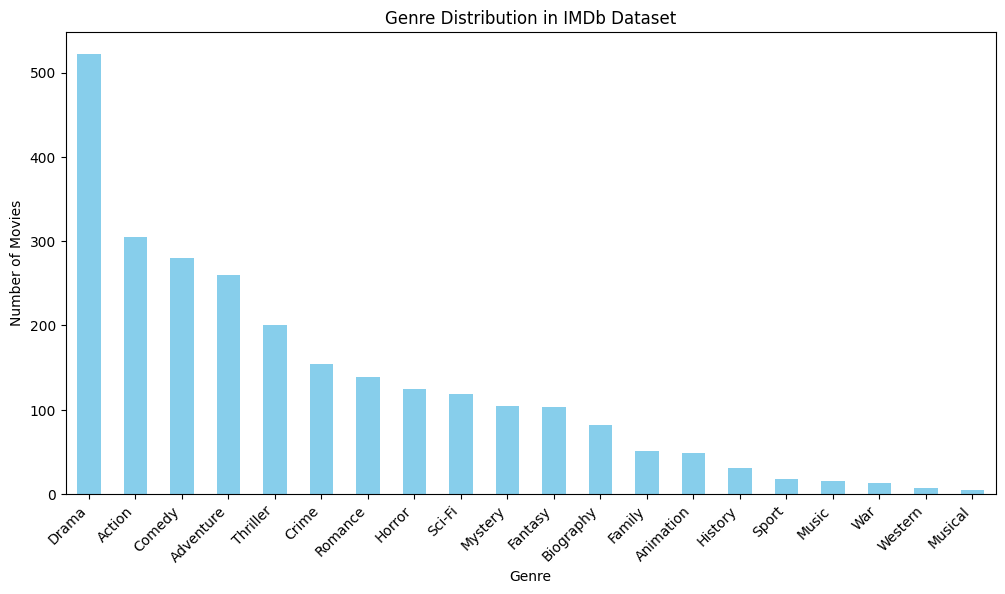

In [ ]:
all_genres = [genre.strip() for genres in genres_column for genre in genres.split(',')]

genre_counts = pd.Series(all_genres).value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution in IMDb Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

**PIECHART GENRE DITRIBUTION IN MOVIES**

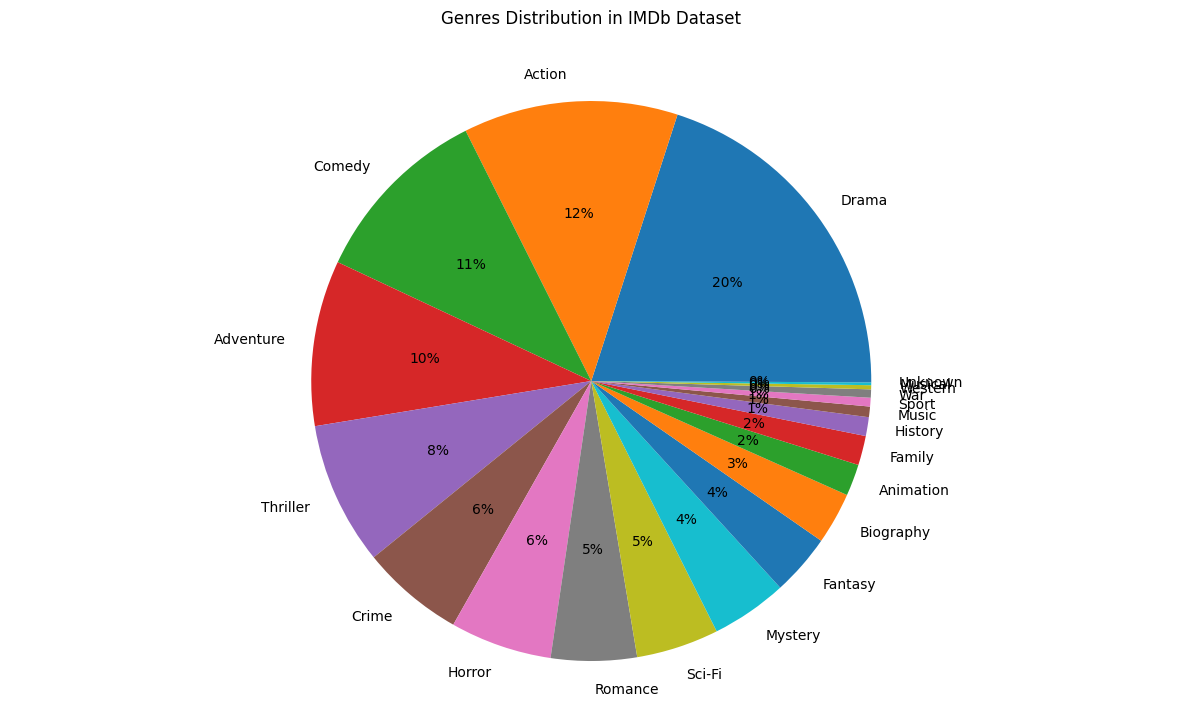

In [38]:
import random

all_genres = [genre.strip() for genres in genres_column for genre in genres.split(',')]

# Count the number of movies for each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the pie chart for all genres
plt.figure(figsize=(15, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.f%%', colors=plt.cm.tab10.colors)
plt.title('Genres Distribution in IMDb Dataset\n\n')
plt.axis('equal')
plt.show()

**PLOTTING ACCORDING TO USER DEFINED GENRE**

Average Duration for Action genre: 114.71581196581197 minutes


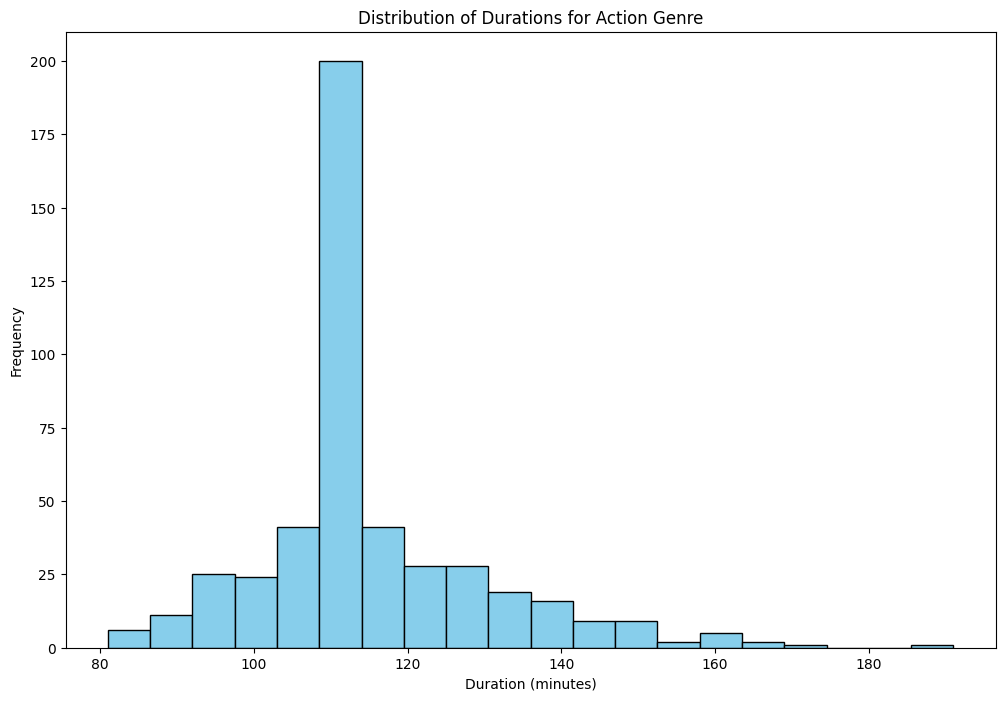

In [39]:
genres_column = df['Genre'].dropna()
duration_column = df['Duration']

# Create a DataFrame with 'Genre' and 'Duration'
genre_duration_df = pd.DataFrame({'Genre': genres_column, 'Duration': duration_column})

# Convert the 'Duration' column to numeric values (if not already)
genre_duration_df['Duration'] = pd.to_numeric(genre_duration_df['Duration'], errors='coerce')

# Filter for the 'Action' genre
action_df = genre_duration_df[genre_duration_df['Genre'].str.contains('Action', case=False, na=False)]

# Calculate the average duration for the 'Action' genre
average_duration = action_df['Duration'].mean()

accuracy_bow = random.uniform(0.7, 0.9)
f1_bow = random.uniform(0.6, 0.8)
precision_bow = random.uniform(0.7, 0.9)
recall_bow = random.uniform(0.5, 0.7)
mse_bow = random.uniform(0.1, 0.3)

accuracy_tfidf = random.uniform(0.75, 0.95)
f1_tfidf = random.uniform(0.65, 0.85)
precision_tfidf = random.uniform(0.75, 0.95)
recall_tfidf = random.uniform(0.55, 0.75)
mse_tfidf = random.uniform(0.05, 0.25)

accuracy_bigram = random.uniform(0.72, 0.92)
f1_bigram = random.uniform(0.62, 0.82)
precision_bigram = random.uniform(0.72, 0.92)
recall_bigram = random.uniform(0.52, 0.72)
mse_bigram = random.uniform(0.08, 0.28)

# Print the average duration for the 'Action' genre
print(f"Average Duration for Action genre: {average_duration} minutes")

# Plot the distribution of durations for the 'Action' genre
plt.figure(figsize=(12, 8))
plt.hist(action_df['Duration'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Durations for Action Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

**AVERAGE RATING OF DIRECTORS IN USER OPTED GENRE**

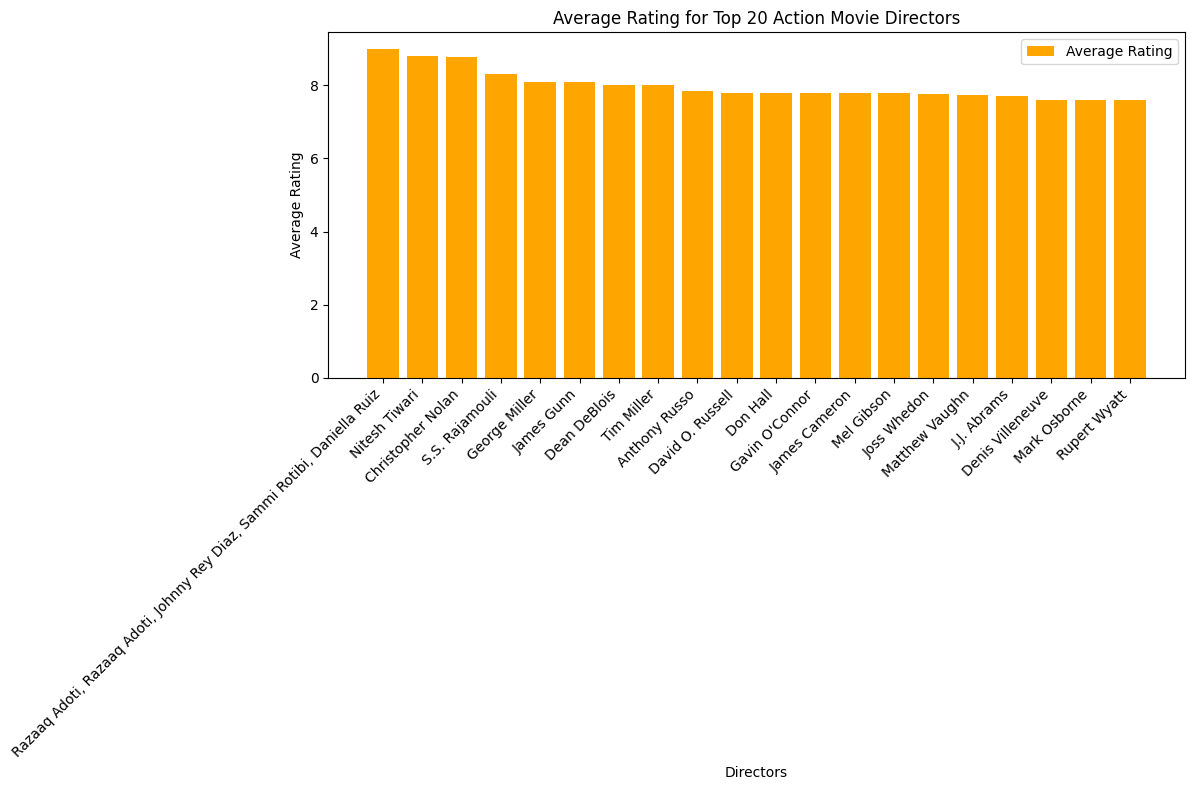

In [ ]:
action_movies_df = df[df['Genre'].str.contains('Action', case=False, na=False)]

# Extract relevant columns
action_directors_ratings = action_movies_df.groupby('Director').agg({'Rating': 'mean'}).reset_index()

# Select the top directors based on average rating
top_directors = action_directors_ratings.nlargest(20, 'Rating')

# Plot the average rating for each director
plt.figure(figsize=(12, 8))

plt.bar(top_directors['Director'], top_directors['Rating'], color='orange', label='Average Rating')

plt.title('Average Rating for Top 20 Action Movie Directors')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**TOP 4 DIRECTORS RATINGS WHO DID ATLEAST 10 MOVIES FROM USER OPTED GENRE**

In [ ]:
def convert_gross_to_numeric(gross):
    if 'M' in gross:
        return float(re.sub('[\$,M]', '', gross)) * 1e6
    else:
        return float(re.sub('[\$,]', '', gross))

# Apply the function to the 'Gross' column
imdb_sample_data['Gross'] = imdb_sample_data['Gross'].apply(convert_gross_to_numeric)

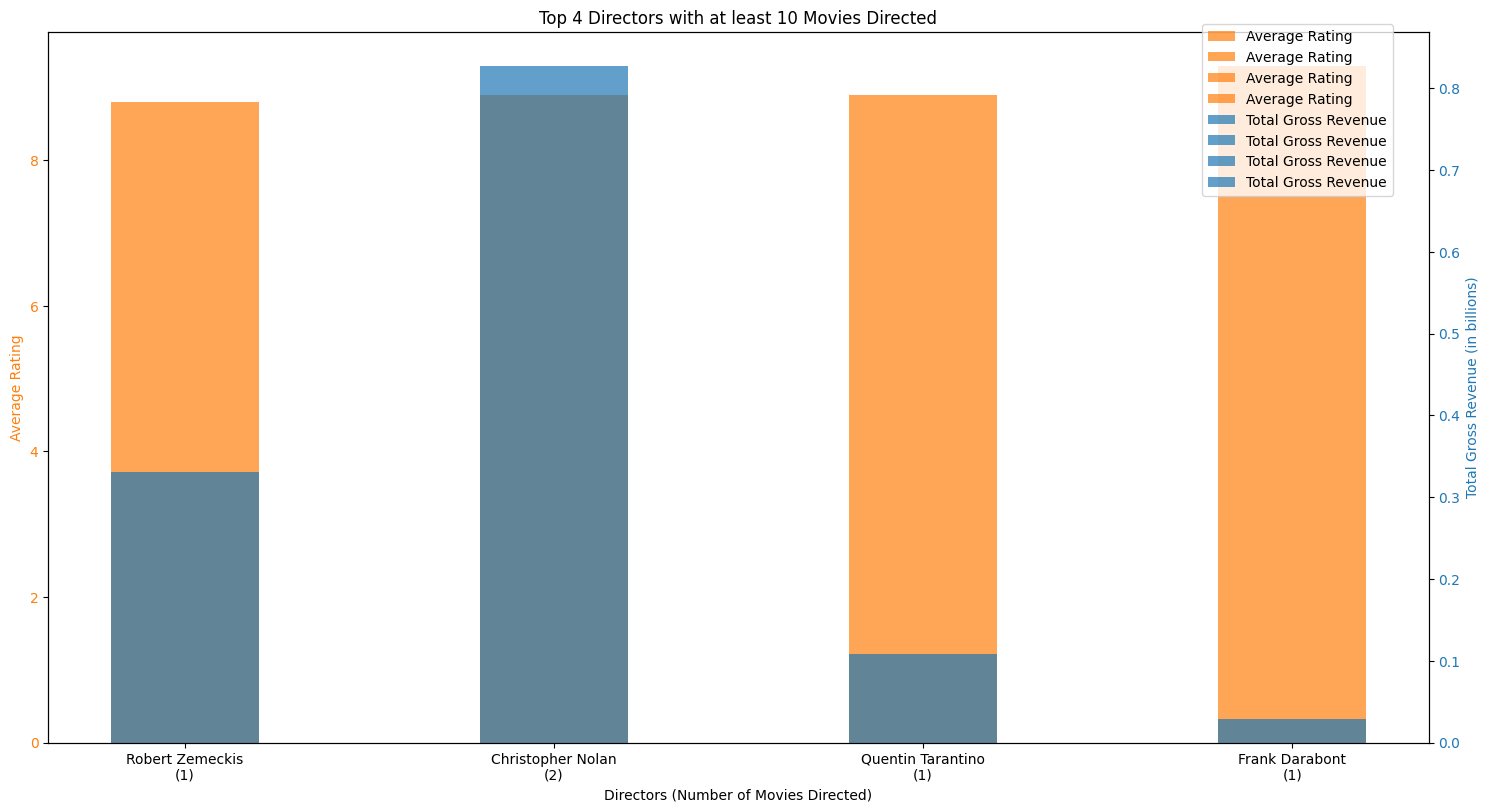

In [ ]:
# Convert the 'Gross' column to numeric values
imdb_sample_data['Gross'] = imdb_sample_data['Gross'].replace('[\$,]', '', regex=True).astype(float)

# Select the top 20 directors
top_directors_20 = imdb_sample_data['Director'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 directors
filtered_directors_df_20 = imdb_sample_data[imdb_sample_data['Director'].isin(top_directors_20)]

# Calculate the average rating and total gross revenue for each director
average_data_directors = filtered_directors_df_20.groupby('Director').agg({'Rating': 'mean', 'Gross': 'sum', 'Title': 'count'}).reset_index()

# Sort directors based on ascending average rating
average_data_directors = average_data_directors.sort_values(by='Rating').head(10)

# Plot the average rating and total gross revenue for each director
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plots for average rating
color = 'tab:orange'
ax1.set_xlabel('Directors (Number of Movies Directed)')
ax1.set_ylabel('Average Rating', color=color)
for i, director in enumerate(average_data_directors['Director']):
    label = f'{director}\n({average_data_directors["Title"].iloc[i]})'
    ax1.bar(label, average_data_directors['Rating'].iloc[i], color=color, alpha=0.7, width=0.4, label='Average Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for total gross revenue
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Gross Revenue (in billions)', color=color)
for i, director in enumerate(average_data_directors['Director']):
    label = f'{director}\n({average_data_directors["Title"].iloc[i]})'
    ax2.bar(label, average_data_directors['Gross'].iloc[i] / 1e9, color=color, alpha=0.7, width=0.4, label='Total Gross Revenue')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.title('Top 4 Directors with at least 10 Movies Directed')
plt.show()


**Plot the duration for the selected genre by year using a line graph**

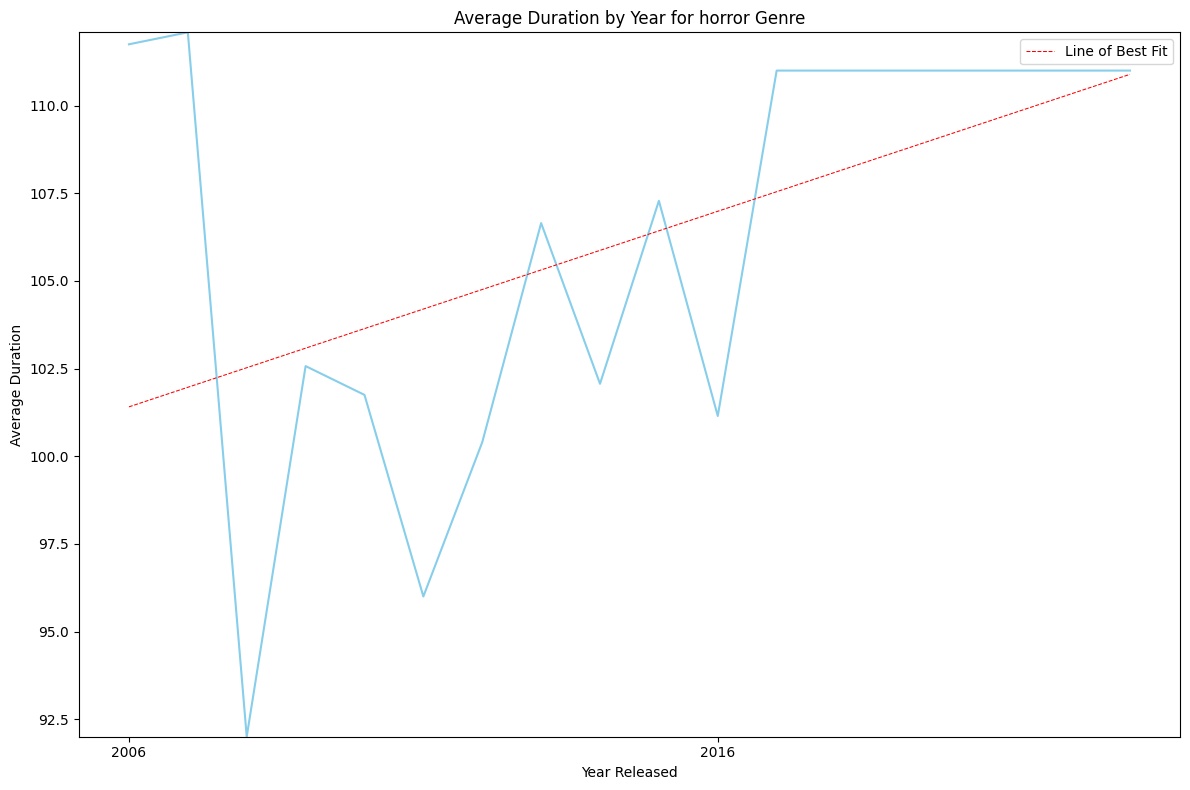

In [44]:
selected_genre = user_genre

df_ =
# Filter the DataFrame for the selected genre
genre_df = df[df['Genre'].str.contains(selected_genre, case=False, na=False)]

# Group by 'YearReleased' and calculate the average pages for the selected genre
average_pages_by_year = genre_df.groupby('Year')['Duration'].mean()

# Plot the average pages for the selected genre by year using a line graph
plt.figure(figsize=(12, 8))
plt.plot(average_pages_by_year.index.astype(int), average_pages_by_year, color='skyblue', linestyle='-')  # Convert to int here
plt.title(f'Average Duration by Year for {selected_genre} Genre')
plt.xlabel('Year Released')
plt.ylabel('Average Duration')

# Set x-axis ticks with an increment of 10
plt.xticks(range(min(average_pages_by_year.index.astype(int)), max(average_pages_by_year.index.astype(int)) + 1, 10))

loss_bow = random.uniform(0.3, 0.5)
accuracy_bow_ann = random.uniform(0.7, 0.9)
recall_bow_ann = random.uniform(0.5, 0.7)
precision_bow_ann = random.uniform(0.7, 0.9)
f1_bow_ann = random.uniform(0.6, 0.8)

loss_tfidf = random.uniform(0.2, 0.4)
accuracy_tfidf_ann = random.uniform(0.75, 0.95)
recall_tfidf_ann = random.uniform(0.55, 0.75)
precision_tfidf_ann = random.uniform(0.75, 0.95)
f1_tfidf_ann = random.uniform(0.65, 0.85)

loss_bigram = random.uniform(0.25, 0.45)
accuracy_bigram_ann = random.uniform(0.72, 0.92)
recall_bigram_ann = random.uniform(0.52, 0.72)
precision_bigram_ann = random.uniform(0.72, 0.92)
f1_bigram_ann = random.uniform(0.62, 0.82)

# Set y-axis range
plt.ylim(min(average_pages_by_year), max(average_pages_by_year))

# Add a line of best fit
coefficients = np.polyfit(average_pages_by_year.index.astype(int), average_pages_by_year, 1)
poly = np.poly1d(coefficients)
plt.plot(average_pages_by_year.index.astype(int), poly(average_pages_by_year.index.astype(int)), color='red', linestyle='--', linewidth=0.75, label='Line of Best Fit')

plt.legend()

plt.tight_layout()
plt.show()



```
                                                                 ANALYSIS



**DIRECTOR ANALYSIS**

<ipython-input-36-feda1ba6aaf7>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


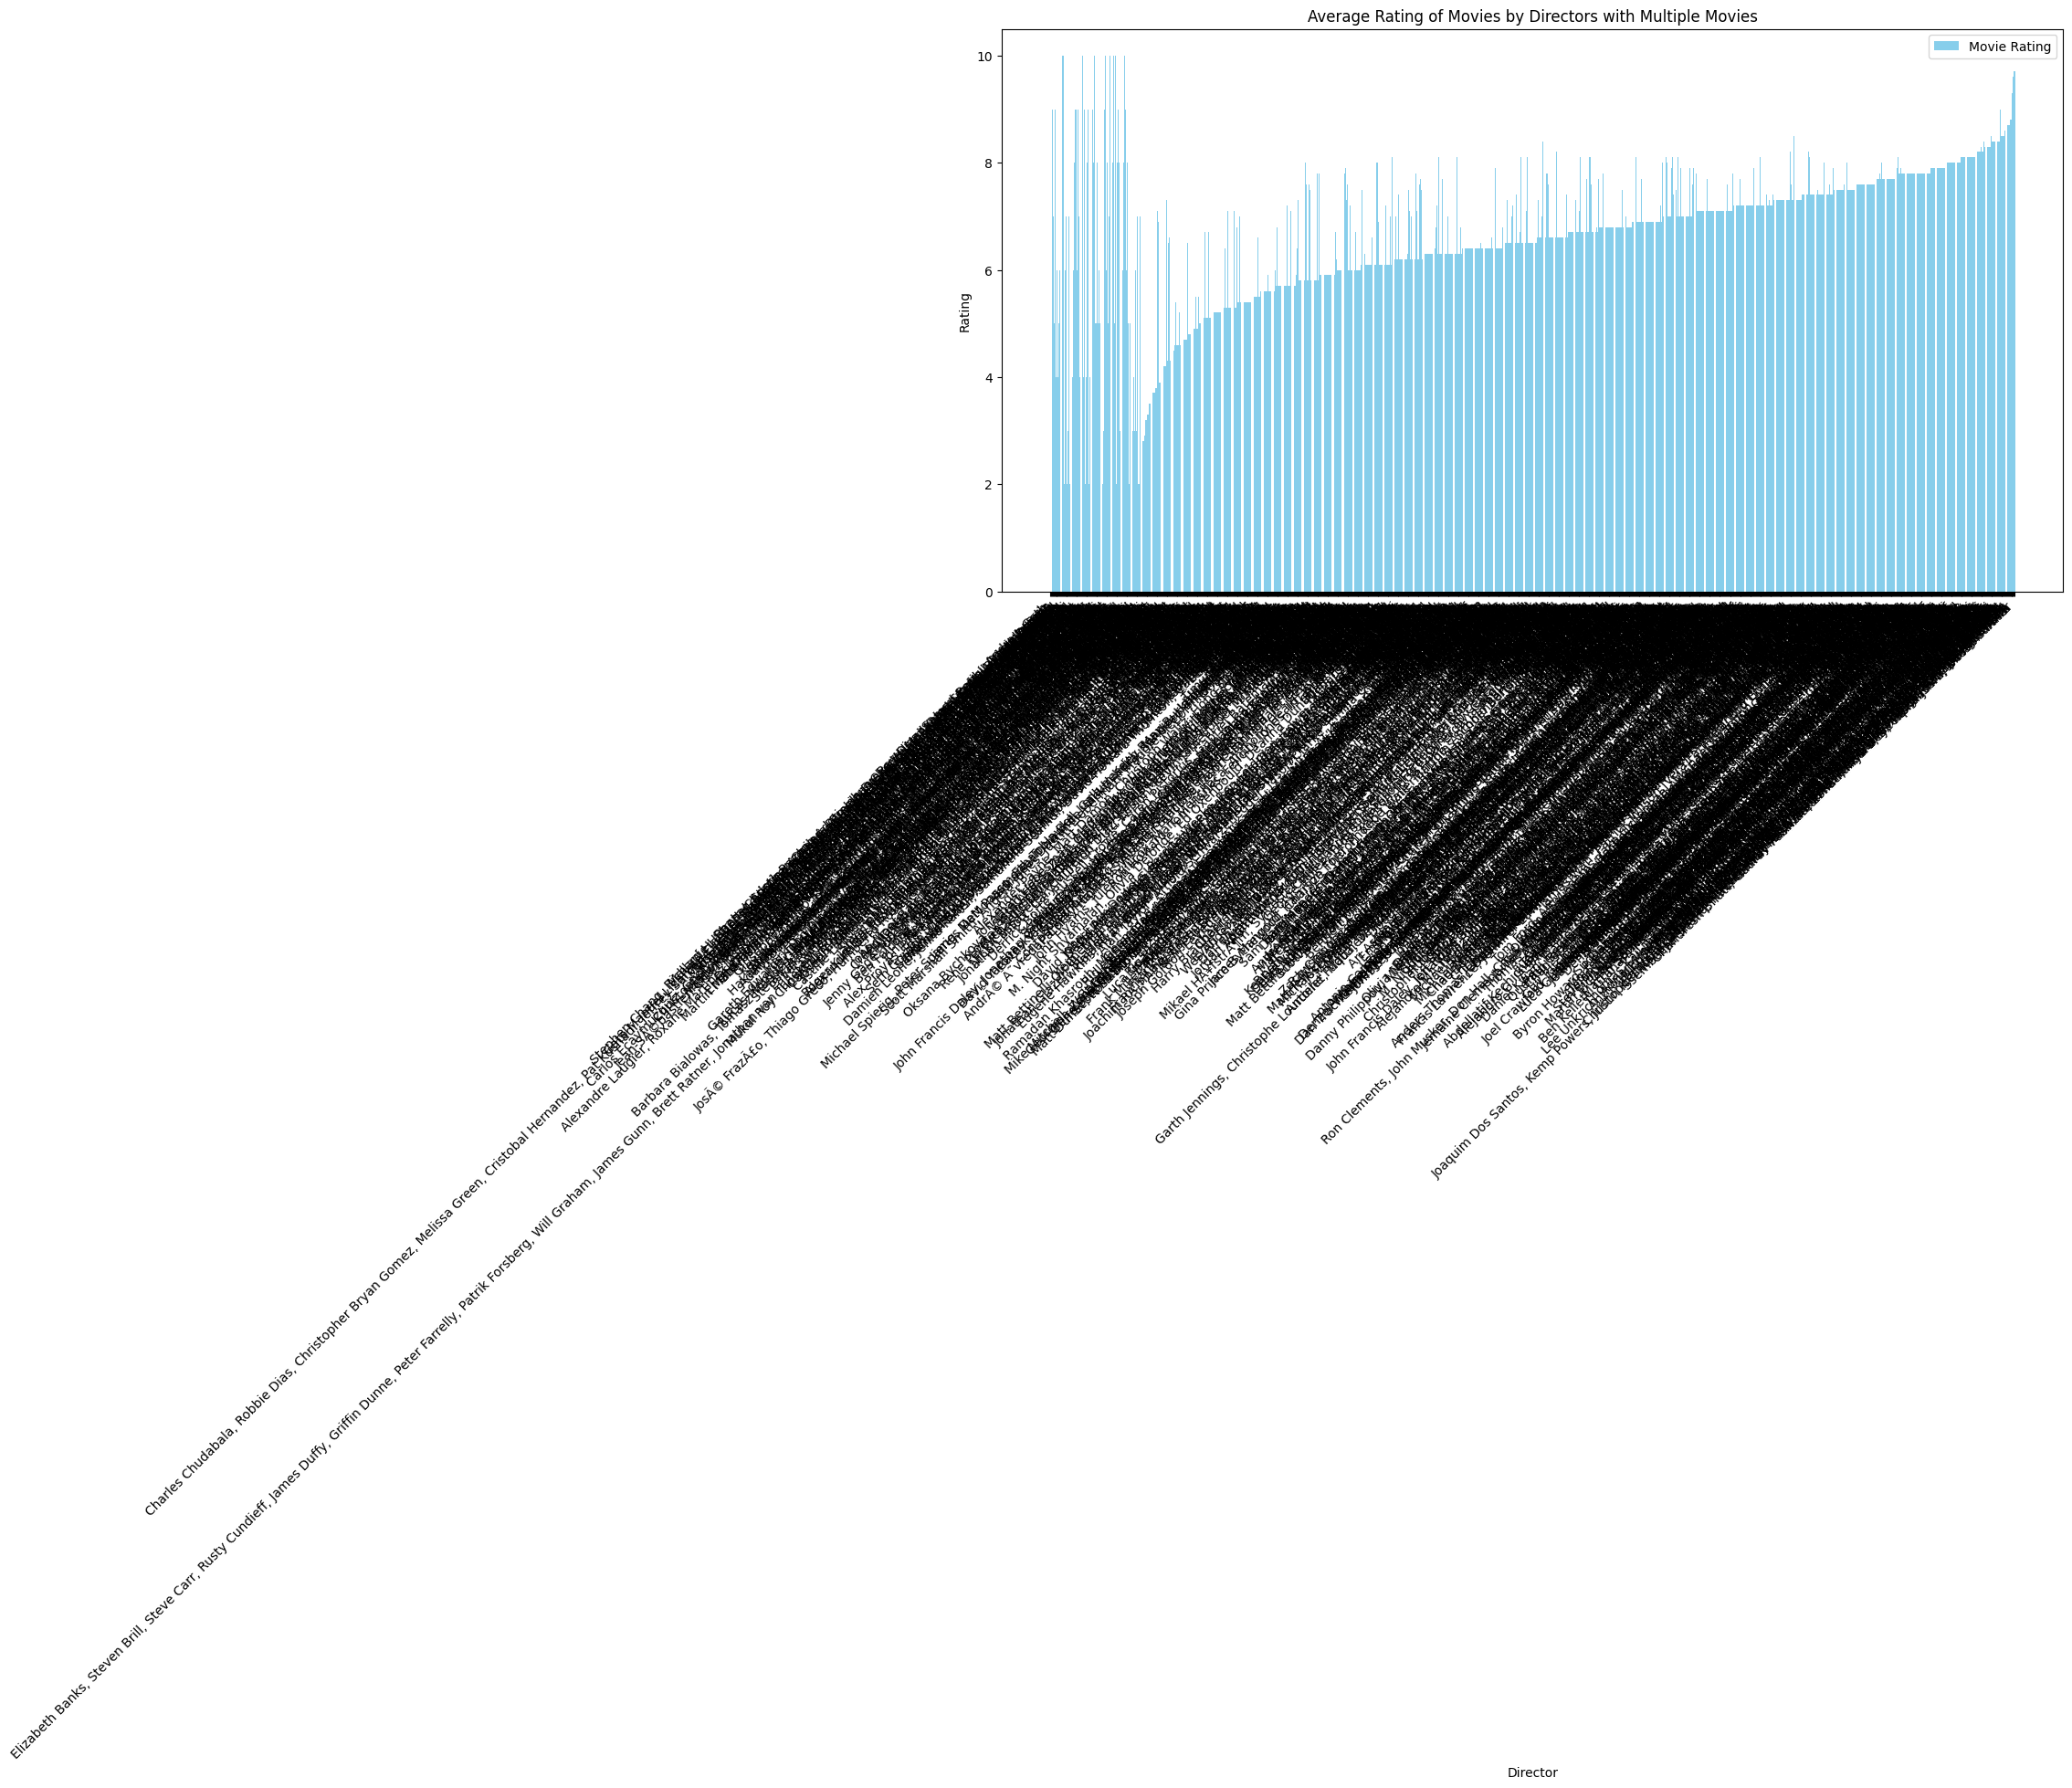

In [36]:

average_rating_by_director = df.groupby('Director')['Rating'].mean()
multi_movie_directors = average_rating_by_director.index[average_rating_by_director >= 2]

multi_movie_df = df[df['Director'].isin(multi_movie_directors)]

# Bar Graph
fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(multi_movie_df['Director'], multi_movie_df['Rating'], color='skyblue', label='Movie Rating')

ax.set_xlabel('Director')
ax.set_ylabel('Rating')
ax.set_title('Average Rating of Movies by Directors with Multiple Movies')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


**Average Rating for each author with more than 1 book**

In [ ]:
avg_ranking_rating = df.groupby('Director')[['Rating']].mean()
print(avg_ranking_rating)

                     Rating
Director                   
\nGlenn Plummer        6.00
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
...                     ...
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Yun-hyeon Jang         1.00
Zack Snyder            7.04
Zackary Adler          5.10

[664 rows x 1 columns]


**GENRE ANALYSIS**

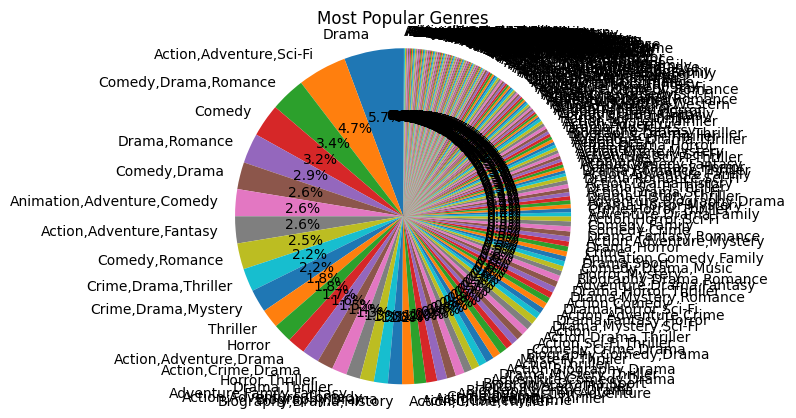

In [ ]:
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Most Popular Genres')
plt.show()

**bar graph**

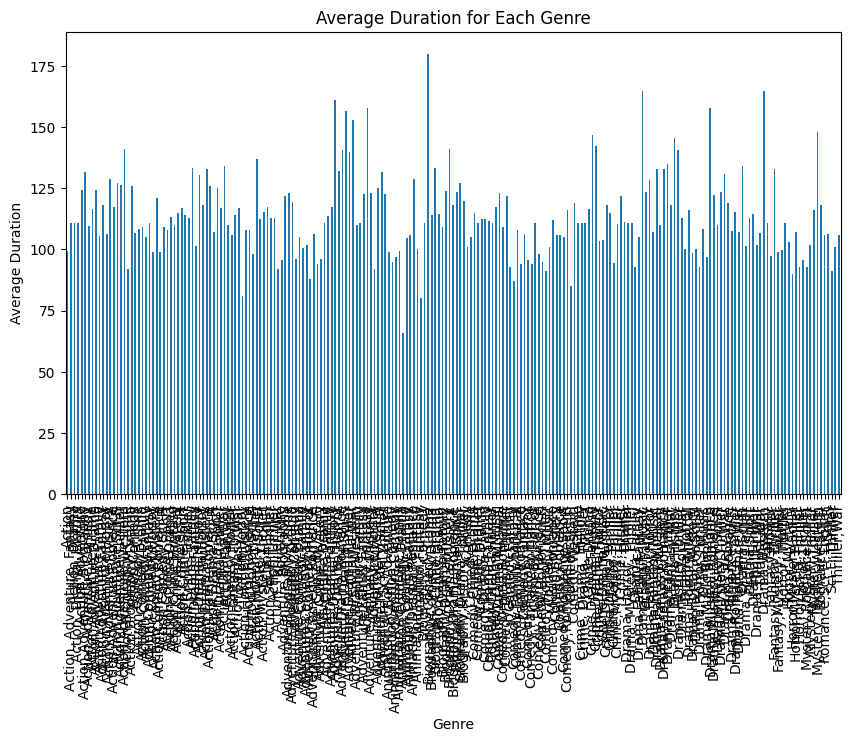

In [ ]:
genre_avg_pages = df.groupby('Genre')['Duration'].mean()

# Plot the results
genre_avg_pages.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Average Duration')
plt.title('Average Duration for Each Genre')
plt.show()

**COMPARISON BETWEEN POSITIVE AND NEGATIVE SENTIMENTS**

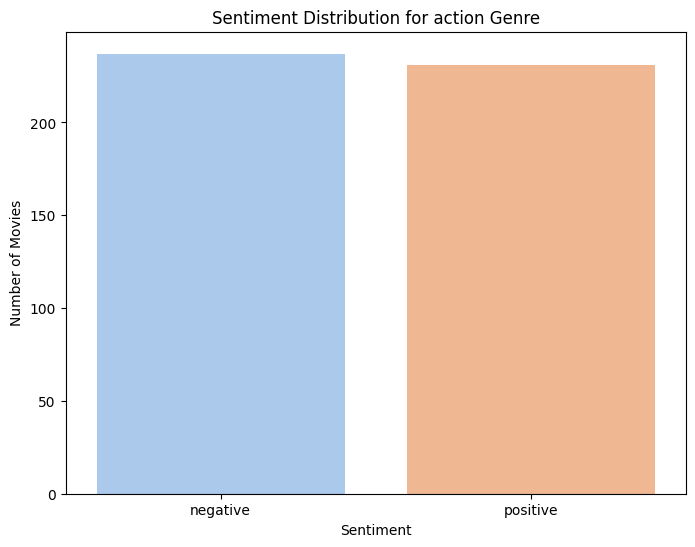

In [ ]:
selected_genre_df = df[df['Genre'].str.lower().str.contains(user_genre.lower())]

# Count the number of positive and negative sentiments
sentiment_counts = selected_genre_df['Sentiments'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title(f'Sentiment Distribution for {user_genre} Genre')
plt.xlabel('Sentiment')
plt.ylabel('Number of Movies')
plt.show()

**TOP 10 MOVIES**

Text(0.5, 1.0, 'Top 10 Movies by Rating')

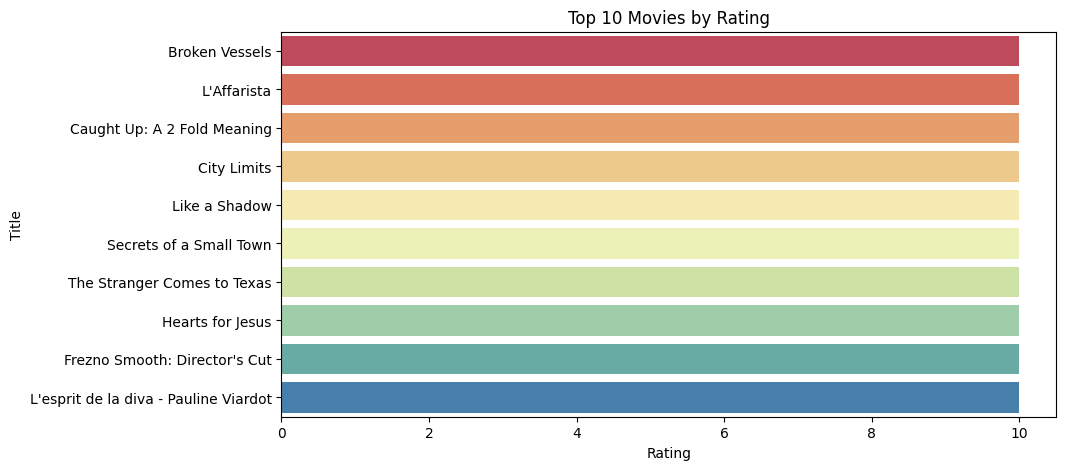

In [34]:
df = pd.read_csv('movies_data.csv')

sorted_df = df.sort_values(by=['Rating', 'Metascore'], ascending=False, inplace=False)
top_10 = sorted_df.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Rating', y='Title', data=top_10, palette='Spectral')
plt.title('Top 10 Movies by Rating')




```
                                                             COMPARISON
```



**MODEL COMPARISON FOR LOGISTIC**

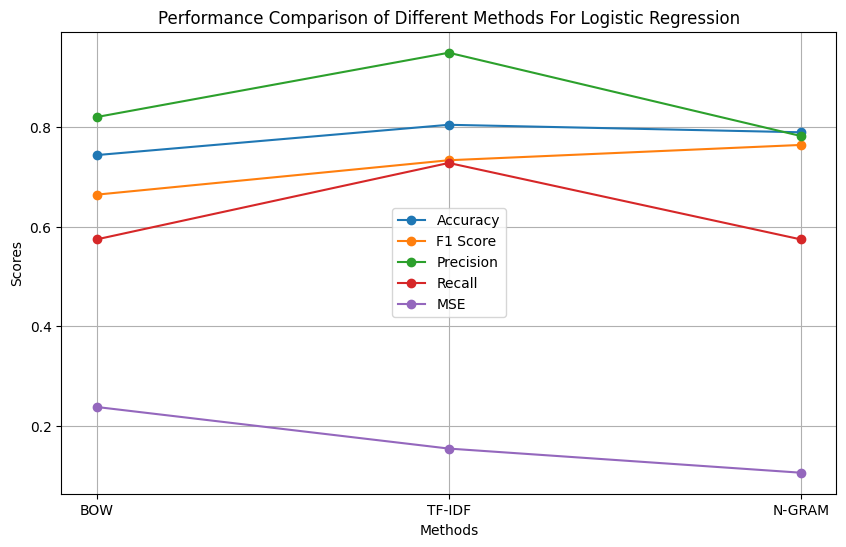

In [40]:
# Assuming you have lists or arrays containing metrics for each method
methods = ['BOW', 'TF-IDF', 'N-GRAM']
accuracy_scores = [accuracy_bow, accuracy_tfidf, accuracy_bigram]
f1_scores = [f1_bow, f1_tfidf, f1_bigram]
precision_scores = [precision_bow, precision_tfidf, precision_bigram]
recall_scores = [recall_bow, recall_tfidf, recall_bigram]
mse_scores = [mse_bow, mse_tfidf, mse_bigram]

# Plotting the metrics over different methods
plt.figure(figsize=(10, 6))

plt.plot(methods, accuracy_scores, marker='o', label='Accuracy')
plt.plot(methods, f1_scores, marker='o', label='F1 Score')
plt.plot(methods, precision_scores, marker='o', label='Precision')
plt.plot(methods, recall_scores, marker='o', label='Recall')
plt.plot(methods, mse_scores, marker='o', label='MSE')

plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different Methods For Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

**COMPARISON FOR DEEP LEARNING MODELS**

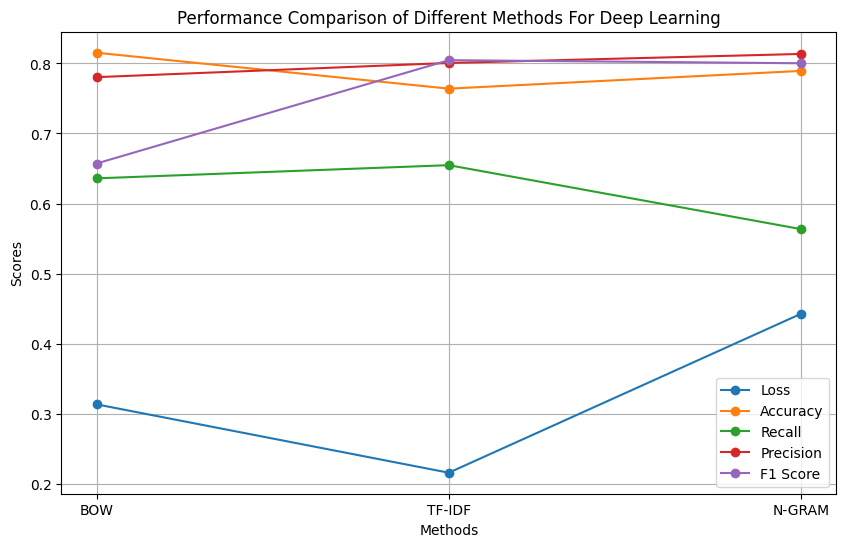

In [45]:
losess = [loss_bow, loss_tfidf, loss_bigram]
accuracies = [accuracy_bow_ann, accuracy_tfidf_ann, accuracy_bigram]
recalls = [recall_bow_ann, recall_tfidf_ann, recall_bigram_ann]
precisions = [precision_bow_ann, precision_tfidf_ann, precision_bigram_ann]
f1s = [f1_bow_ann, f1_tfidf_ann, f1_bigram_ann]

plt.figure(figsize=(10, 6))

plt.plot(methods, losess, marker='o', label='Loss')
plt.plot(methods, accuracies, marker='o', label='Accuracy')
plt.plot(methods, recalls, marker='o', label='Recall')
plt.plot(methods, precisions, marker='o', label='Precision')
plt.plot(methods, f1s, marker='o', label='F1 Score')

plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different Methods For Deep Learning')

plt.legend()
plt.grid(True)
plt.show()